#Imports

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay


#Explore data

In [4]:
data= pd.read_csv('/content/data.csv')

In [5]:
data.head(5)

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [6]:
data.shape

(863, 15)

In [7]:
data=data.drop('Unnamed: 0',axis=1)

In [8]:
data.result.value_counts()

0    755
1    108
Name: result, dtype: int64

In [9]:
data.head(5)

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [10]:
from sklearn.manifold import TSNE

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


tsne data dim: (863, 2)


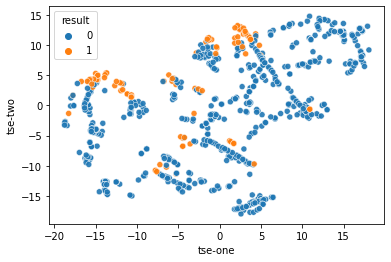

In [11]:
def plot_tsne(data_mat,labels):
    df_tsne = pd.DataFrame()
    tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300,random_state=44)
    tsne_results = tsne.fit_transform(data_mat)
    print(f'tsne data dim: {tsne_results.shape}')
    df_tsne['tse-one'] = tsne_results[:,0]
    df_tsne['tse-two'] = tsne_results[:,1]
    sns.scatterplot(
        x=df_tsne['tse-one'], y=df_tsne['tse-two'],
        hue=labels,
        legend="full",
        alpha=0.9)

plot_tsne(data.iloc[:,:13],data.iloc[:,-1])

## Used Functions

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def plot_class_metrics(y_test,y_pred):
    print(confusion_matrix(y_test, y_pred))
    ax = sns.heatmap(confusion_matrix(y_test,y_pred ), annot=True, cmap='PuBuGn')
    plt.xlabel('Predicted', fontsize=18)
    plt.ylabel('Actual', fontsize=18)
    plt.show()
    print(classification_report(y_test,y_pred))

In [13]:
def Gridsearch_and_Crossvalidation (estimator,grid):
  e_cv = GridSearchCV(estimator=estimator(), param_grid=grid, cv=5)
  e_cv.fit(x_train, y_train)
  return e_cv.best_params_

In [44]:
# Divide our data
from sklearn.model_selection import train_test_split
X= data.iloc[:,:13]
y= data.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10, stratify=y)


#Classifires

## DecisionTreeClassifier

In [15]:
clf1_dt = DecisionTreeClassifier().fit(x_train, y_train)
dt_y_pred= clf1_dt.predict(x_test)

[[150   1]
 [  2  20]]


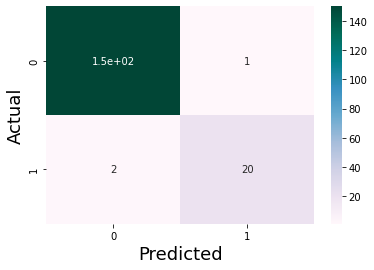

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       151
           1       0.95      0.91      0.93        22

    accuracy                           0.98       173
   macro avg       0.97      0.95      0.96       173
weighted avg       0.98      0.98      0.98       173



In [16]:
plot_class_metrics(y_test,dt_y_pred)

In [17]:
dt_grid = { 
    'max_features': ['sqrt', 'log2','auto'],
    'max_depth' : [2,3,4,5,6,7,8,9,10,11,12],
    'criterion' :['gini', 'entropy'],
    
}

In [18]:
Gridsearch_and_Crossvalidation(DecisionTreeClassifier,dt_grid)

{'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt'}

In [19]:
#train our model with our best Hyperparameters 
dt_new= DecisionTreeClassifier(criterion='entropy', max_depth=10,max_features='sqrt').fit(x_train, y_train)
dt_pred= dt_new.predict(x_test)

[[147   4]
 [  3  19]]


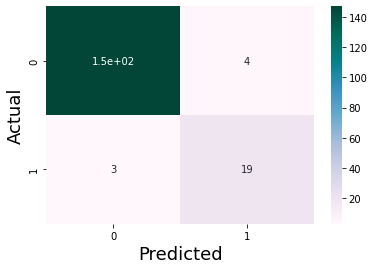

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       151
           1       0.83      0.86      0.84        22

    accuracy                           0.96       173
   macro avg       0.90      0.92      0.91       173
weighted avg       0.96      0.96      0.96       173



In [20]:
plot_class_metrics(y_test,dt_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


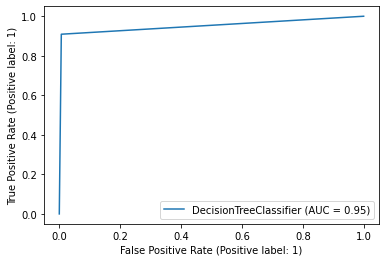

In [48]:
from sklearn import metrics
metrics.plot_roc_curve(clf1_dt, x_test, y_test)
plt.show()

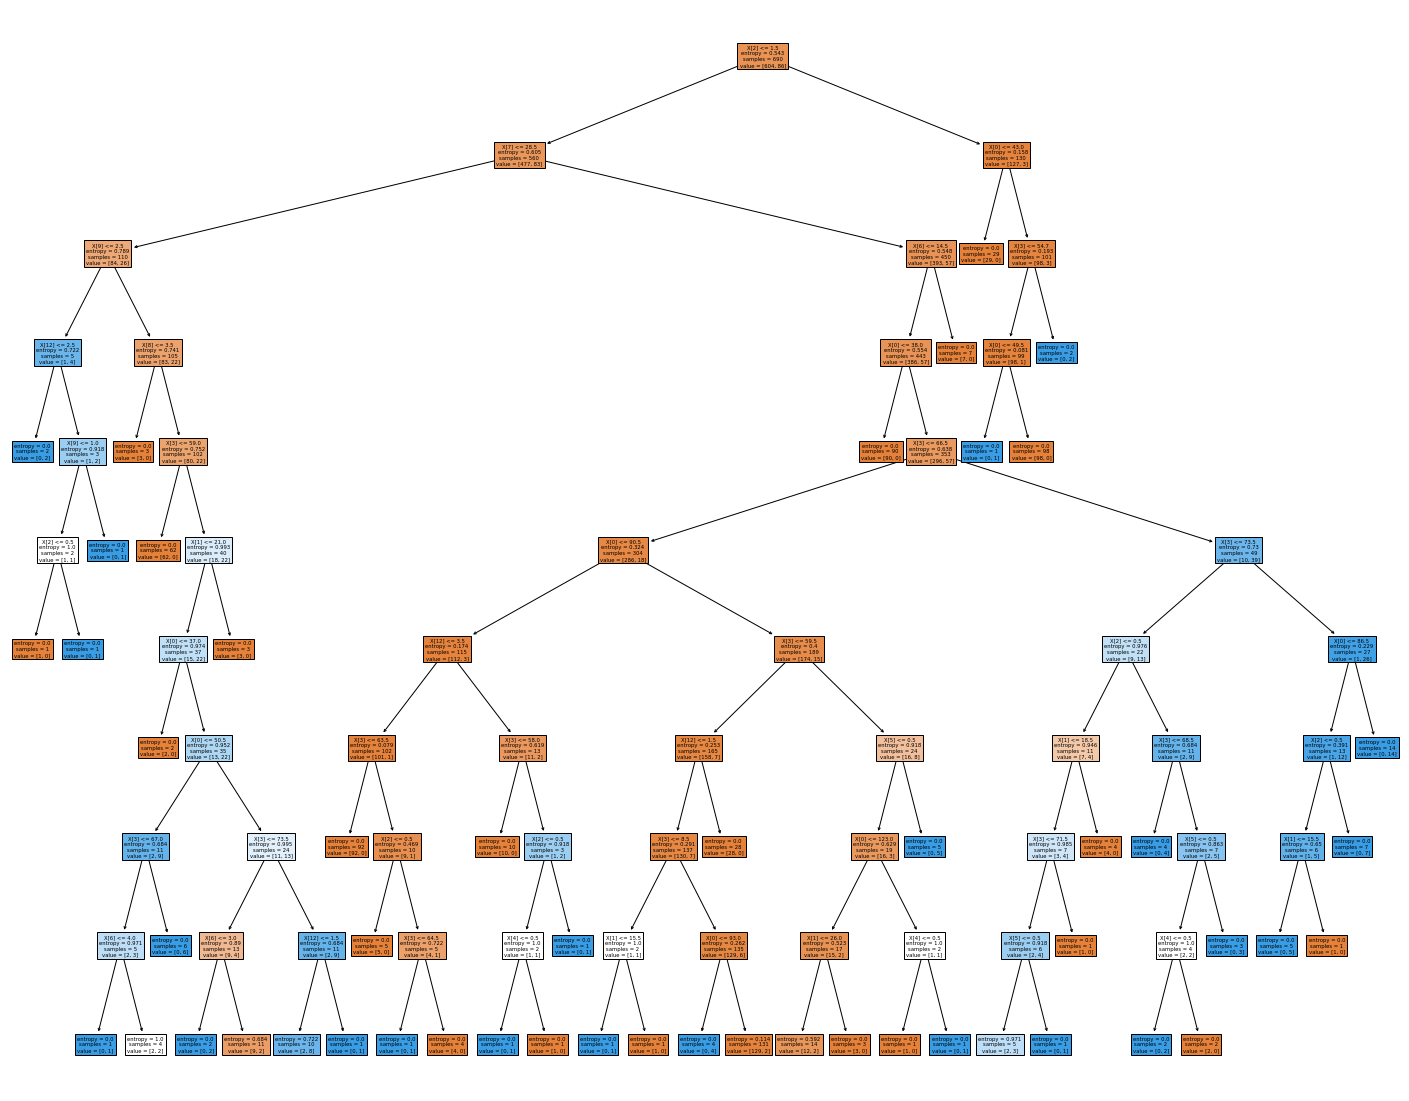

In [21]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_new, max_depth=10,
                   filled=True)

##Logistic Regression

In [22]:
clf2_lg = LogisticRegression(max_iter=10000).fit(x_train, y_train)
lg_y_pred= clf2_lg.predict(x_test)

[[147   4]
 [  8  14]]


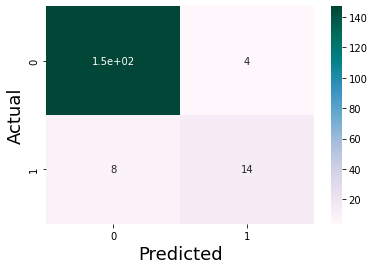

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       151
           1       0.78      0.64      0.70        22

    accuracy                           0.93       173
   macro avg       0.86      0.80      0.83       173
weighted avg       0.93      0.93      0.93       173



In [23]:
plot_class_metrics(y_test,lg_y_pred)

In [24]:
lg_grid={'C':[0.0001,0.001,0.01,0.1,1,10,10,100,1000],"penalty":["l2"],"max_iter":[10000]}

In [25]:
Gridsearch_and_Crossvalidation(LogisticRegression,lg_grid)

{'C': 1, 'max_iter': 10000, 'penalty': 'l2'}

In [26]:
#train our model with our best Hyperparameters 
lg_new= LogisticRegression(C=1,penalty= 'l2',max_iter=10000).fit(x_train, y_train)
lg_pred= lg_new.predict(x_test)

[[147   4]
 [  8  14]]


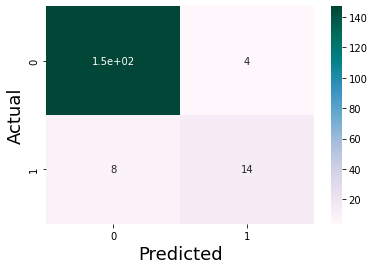

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       151
           1       0.78      0.64      0.70        22

    accuracy                           0.93       173
   macro avg       0.86      0.80      0.83       173
weighted avg       0.93      0.93      0.93       173



In [27]:
plot_class_metrics(y_test,lg_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


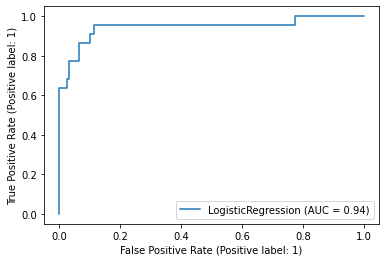

In [49]:
from sklearn import metrics
metrics.plot_roc_curve(clf2_lg, x_test, y_test)
plt.show()

##K-Nearest Neighbors

In [28]:
clf3_knn = KNeighborsClassifier().fit(x_train, y_train)
knn_y_pred= clf3_knn.predict(x_test)  

[[149   2]
 [  5  17]]


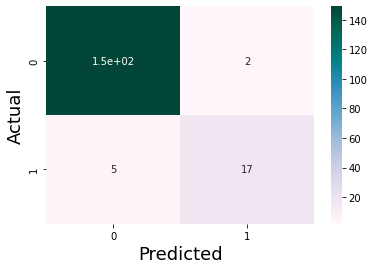

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       151
           1       0.89      0.77      0.83        22

    accuracy                           0.96       173
   macro avg       0.93      0.88      0.90       173
weighted avg       0.96      0.96      0.96       173



In [29]:
plot_class_metrics(y_test,knn_y_pred)

In [30]:

k_range = list(range(1, 31))
knn_grid = dict(n_neighbors=k_range)


In [31]:
Gridsearch_and_Crossvalidation(KNeighborsClassifier,knn_grid)

{'n_neighbors': 3}

In [32]:
#train our model with our best Hyperparameters 
knn_new= KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)
knn_pred= knn_new.predict(x_test)

[[147   4]
 [  6  16]]


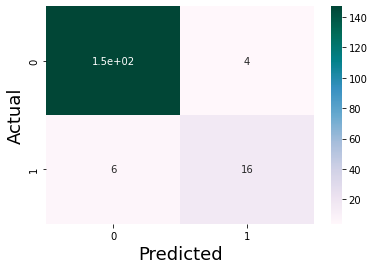

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       151
           1       0.80      0.73      0.76        22

    accuracy                           0.94       173
   macro avg       0.88      0.85      0.86       173
weighted avg       0.94      0.94      0.94       173



In [33]:
plot_class_metrics(y_test,knn_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


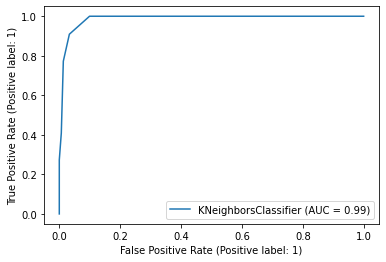

In [51]:
from sklearn import metrics
metrics.plot_roc_curve(clf3_knn, x_test, y_test)
plt.show()

##SVM


In [34]:
from sklearn import svm

[[148   3]
 [ 10  12]]


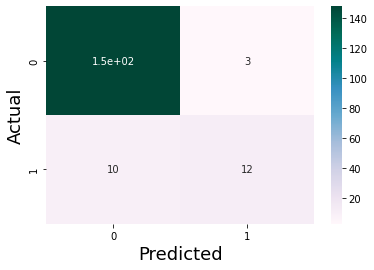

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       151
           1       0.80      0.55      0.65        22

    accuracy                           0.92       173
   macro avg       0.87      0.76      0.80       173
weighted avg       0.92      0.92      0.92       173



In [35]:
svm_clf=svm.SVC().fit(x_train,y_train)
svm_y_pred= svm_clf.predict(x_test)
plot_class_metrics(y_test,svm_y_pred)

In [36]:
svm_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [37]:
Gridsearch_and_Crossvalidation(svm.SVC,svm_grid)

{'C': 10, 'gamma': 0.001, 'kernel': 'poly'}

[[149   2]
 [  1  21]]


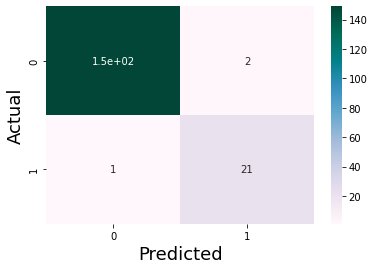

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       151
           1       0.91      0.95      0.93        22

    accuracy                           0.98       173
   macro avg       0.95      0.97      0.96       173
weighted avg       0.98      0.98      0.98       173



In [38]:
svm_new=svm.SVC(kernel='poly',C=10,gamma=0.001).fit(x_train,y_train)
svm_new_pred= svm_new.predict(x_test)
plot_class_metrics(y_test,svm_new_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


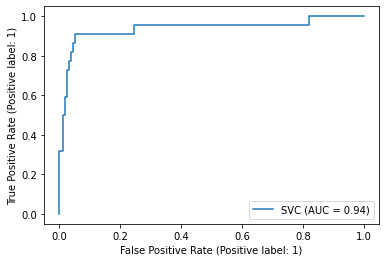

In [52]:
from sklearn import metrics
metrics.plot_roc_curve(svm_clf, x_test, y_test)
plt.show()

##Naïve Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB

[[ 39 112]
 [  1  21]]


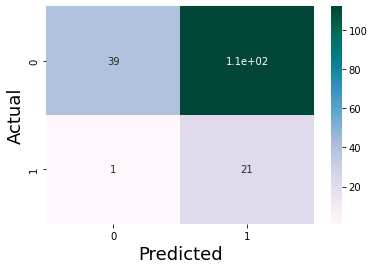

              precision    recall  f1-score   support

           0       0.97      0.26      0.41       151
           1       0.16      0.95      0.27        22

    accuracy                           0.35       173
   macro avg       0.57      0.61      0.34       173
weighted avg       0.87      0.35      0.39       173



In [40]:
NB_clf=GaussianNB().fit(x_train,y_train)
NB_y_pred= NB_clf.predict(x_test)
plot_class_metrics(y_test,NB_y_pred)

In [41]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [42]:
Gridsearch_and_Crossvalidation(GaussianNB,params_NB)

{'var_smoothing': 0.02848035868435802}

[[148   3]
 [ 14   8]]


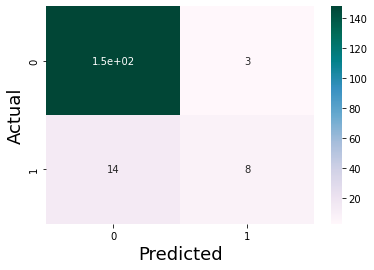

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       151
           1       0.73      0.36      0.48        22

    accuracy                           0.90       173
   macro avg       0.82      0.67      0.72       173
weighted avg       0.89      0.90      0.89       173



In [43]:
NB_new=GaussianNB(var_smoothing=0.02848035868435802).fit(x_train,y_train)
NB_new_pred= NB_new.predict(x_test)
plot_class_metrics(y_test,NB_new_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


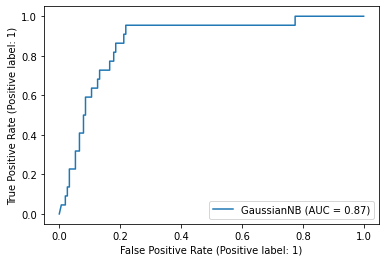

In [53]:
from sklearn import metrics
metrics.plot_roc_curve(NB_clf, x_test, y_test)
plt.show()